In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [4]:
df=pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Insights from Descriptive Analysis**

There is 768 observations of 9 variable. Independent variables are Pregnencies , Glucose, BloodPressure, Insulin, BMI and DiabetesPedigree Function. Age is Outcome Variable. Average Age of Patients are 33.24 with minimum being 21 and maximum 81. Avg. value of independent variables are Preg = 3.845052,Glucose = 120.894531, BP = 69.105469, ST=20.536458, Insulin = 79.799479, BMI = 31.992578 DPF = 0.471876 . Variation in variables can be easily observed from table below :->

In [7]:
print("Standard Deviation of each variables are ==> ")
df.apply(np.std)

Standard Deviation of each variables are ==> 


Pregnancies                   3.367384
Glucose                      31.951796
BloodPressure                19.343202
SkinThickness                15.941829
Insulin                     115.168949
BMI                           7.879026
DiabetesPedigreeFunction      0.331113
Age                          11.752573
Outcome                       0.476641
dtype: float64


**Treating Missing Values and Analysing Distribution of Data**

Histogram of Glucose Level

Mean of Glucose level is :- 120.89453125
Datatype of Glucose Variable is: int64


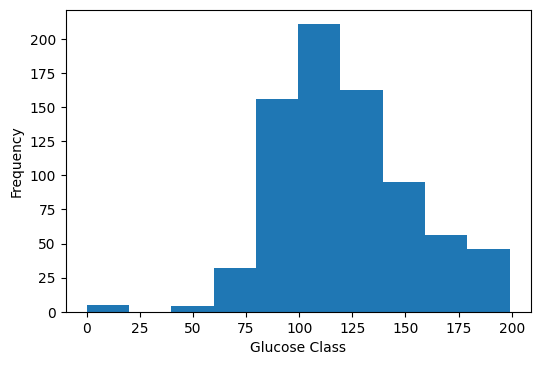

In [8]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Glucose Class')
df['Glucose'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of Glucose level is :-", df['Glucose'].mean())
print("Datatype of Glucose Variable is:",df['Glucose'].dtypes)

We can see from histogram most of observation have Glucose level between 100 and 120.

A value of zero does not make sense and thus indicates missing value. Replacing zero by their mean values.

In [9]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

Histogram of Blood Pressure

Mean of BloodPressure level is :- 69.10546875
Datatype of BloodPressure Variable is: int64


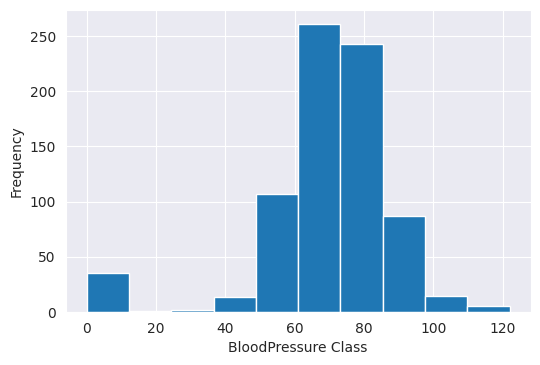

In [10]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('BloodPressure Class')
df['BloodPressure'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of BloodPressure level is :-", df['BloodPressure'].mean())
print("Datatype of BloodPressure Variable is:",df['BloodPressure'].dtypes)

We can see from histogram most of observation have BP level between 70 and 80.

A value of zero does not make sense and thus indicates missing value. Replacing zero by their mean values.

In [11]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

Histogram of Skin Thickness

Mean of SkinThickness is :- 20.536458333333332
Datatype of SkinThickness Variable is: int64


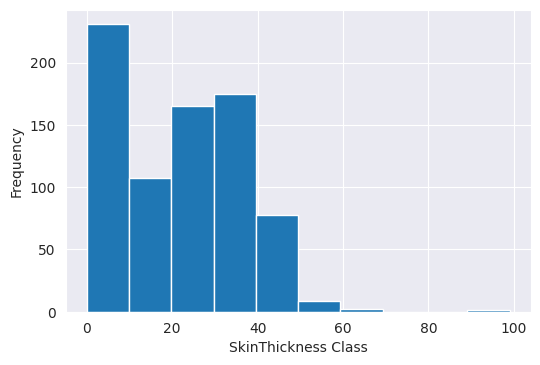

In [12]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('SkinThickness Class')
df['SkinThickness'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of SkinThickness is :-", df['SkinThickness'].mean())
print("Datatype of SkinThickness Variable is:",df['SkinThickness'].dtypes)

We can see from histogram most of observation have SkinThickness between 20 and 30.

A value of zero does not make sense and thus indicates missing value. Replacing zero by their mean values.

Histogram of Insulin

Mean of Insulin is :- 79.79947916666667
Datatype of Insulin Variable is: int64


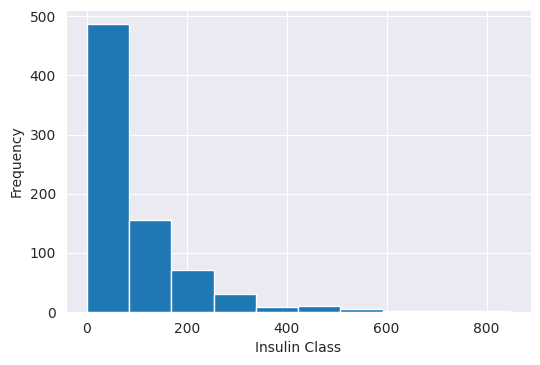

In [13]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Insulin Class')
df['Insulin'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of Insulin is :-", df['Insulin'].mean())
print("Datatype of Insulin Variable is:",df['Insulin'].dtypes)

A value of zero does not make sense and thus indicates missing value. Replacing zero by their mean values.

In [14]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

Histogram of BMI

Mean of BMI is :- 31.992578124999977
Datatype of BMI Variable is: float64


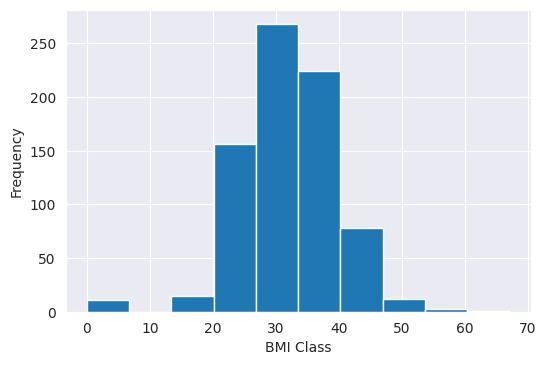

In [15]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('BMI Class')
df['BMI'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of BMI is :-", df['BMI'].mean())
print("Datatype of BMI Variable is:",df['BMI'].dtypes)

We can see from hIstogram most values of BMI are in range 20 and 40.

A value of zero does not make sense and thus indicates missing value. Replacing zero by their mean values.

In [16]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

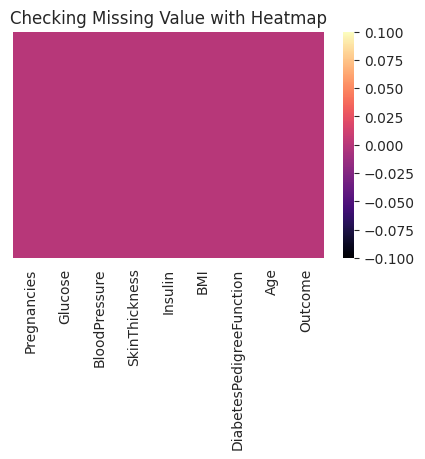

In [17]:
plt.figure(figsize=(5,3),dpi=100)
plt.title('Checking Missing Value with Heatmap')
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,0,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35,168.000000,43.1,2.288,33,1


In [19]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,0,79.799479,30.1,0.349,47,1
767,1,93.0,70.0,31,79.799479,30.4,0.315,23,0


Countplot of Outcome

Count of class is:
 0    500
1    268
Name: Outcome, dtype: int64


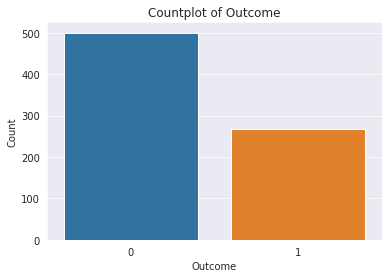

In [20]:
sns.set_style('darkgrid')
sns.countplot(df['Outcome'])
plt.title("Countplot of Outcome")
plt.xlabel('Outcome')
plt.ylabel("Count")
print("Count of class is:\n",df['Outcome'].value_counts())

We can see that both class is balanced so we need not to perform any sampling method to maintain the balance between both classes. Therefor i will be directly using this data in training and testing purpose without performing any sampling method. Meanwhile during Model Validation , we also need not worry abour ROC Curve because data is not imbalanced, but as this is a medical data so i will be using ROC curve to make sure TYPE 2 ERROR will not be there.

Scatter Plot

Text(0.5, 1.0, 'Scatter plot between variables')

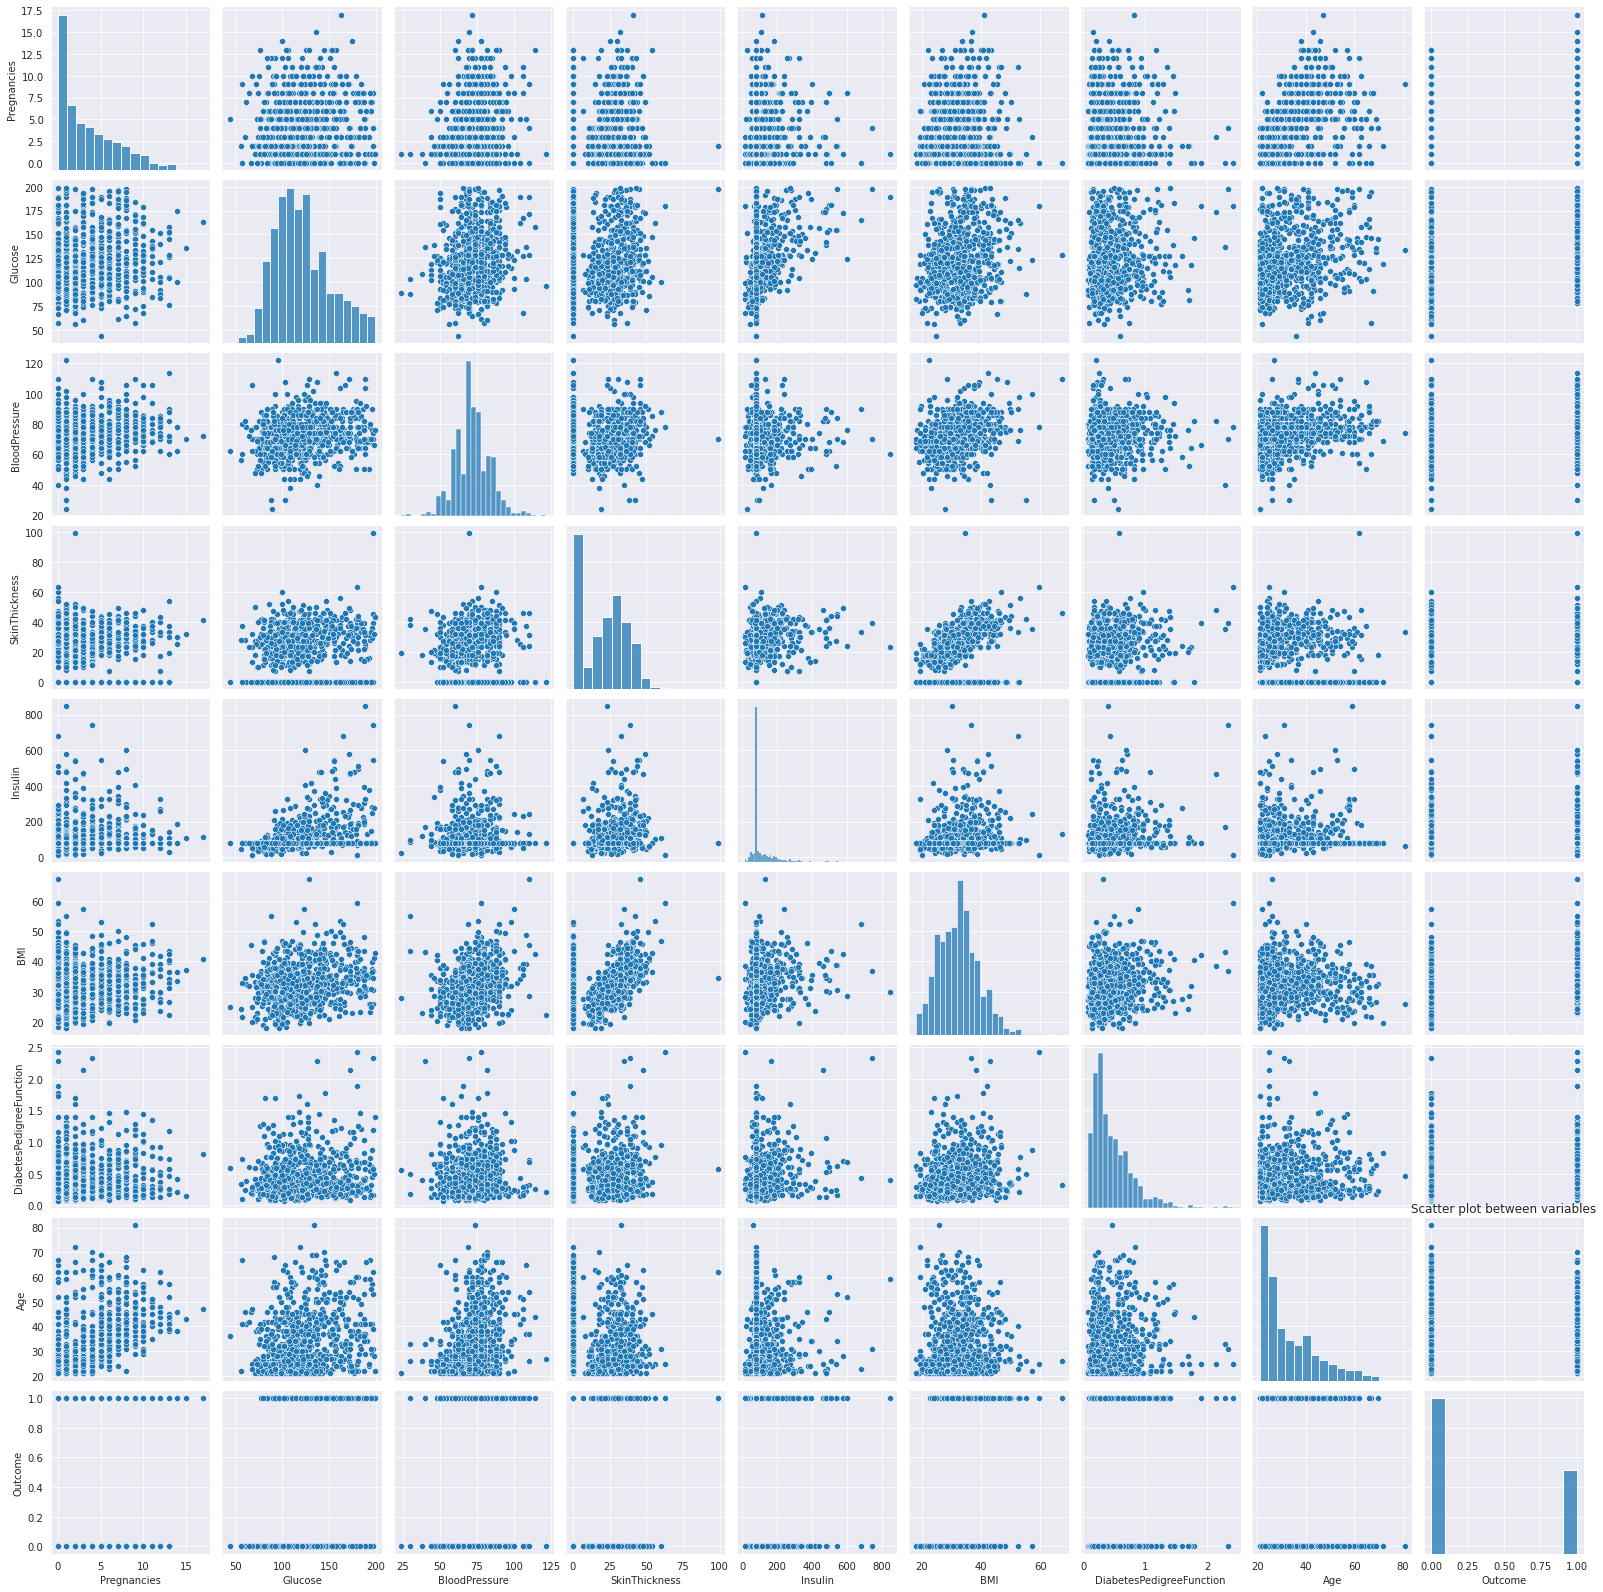

In [21]:
sns.pairplot(df)
plt.title('Scatter plot between variables')

We can see from scatter plot that there is no strong multicolinearity among features.Skin thickness and BMI, Pregnancies and age it looks like there is small chance of positive correlation.Will explore more when analyzing correlation

Correlation Analysis

In [22]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,-0.081672,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.074934,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.020924,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,-0.081672,0.074934,0.020924,1.000000,0.304189,0.381755,0.183928,-0.113970,0.074752
Insulin,-0.018082,0.396597,0.010926,0.304189,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.381755,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.183928,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,-0.113970,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.074752,0.179185,0.312254,0.173844,0.238356,1.000000


We can clearly see that Glucose and BMI has good impact on outcome. There is a strong positive correlation between BMI and Skinthickness or Pregnancies and age

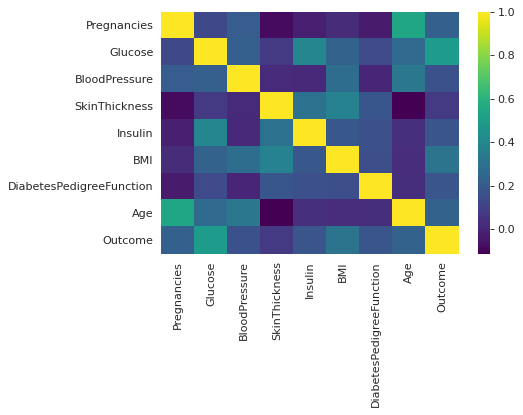

In [23]:
plt.figure(dpi=80)
sns.heatmap(df.corr(),cmap='viridis')

Data Preprocessing

In [24]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [27]:
from sklearn.preprocessing import StandardScaler
Scale=StandardScaler()
x_train_std=Scale.fit_transform(x_train)
x_test_std=Scale.transform(x_test)

In [28]:
norm=lambda a:(a-min(a))/(max(a)-min(a))

In [29]:
df_norm=df.iloc[:,:-1]

In [30]:
df_normalized=df_norm.apply(norm)

In [31]:
x_train_norm,x_test_norm,y_train_norm,y_test_norm=train_test_split(df_normalized.values,y,test_size=0.20,random_state=0)

In [32]:
print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(614, 8)
(154, 8)
(614,)
(154,)


Data is mostly numerical and in such scenario , Logistic Regression works fine. We have also seen in week 2 that variables are depending on target somewhat linearly, So this is also good for Logistic Regression. Will be also using Support Vector Classifier, and Random Forest (Ensemble Learning) to see if accuracy can be improved. Note these learning algorithm also works on linear data very well. To validate model train test split will be used. For accuracy confusion matrix  will be used because classes are balanced. ROC Curve and ROC AUC Score will be used to make sure Type 2 Error will not occur for Positive class, that is 1

KNN

KNN With Standard Scaling

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model.fit(x_train_std,y_train)
knn_pred=knn_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of KNN Model::
0.8116883116883117

 Classification Report::
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154
 


 ROC Curve


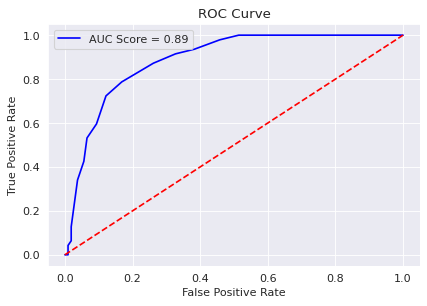

In [34]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn_pred),'\n')
print("\n","ROC Curve")
knn_prob=knn_model.predict_proba(x_test_std)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,knn_prob1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

KNN With Normalization

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_norm = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model_norm.fit(x_train_norm,y_train_norm)
knn_pred_norm=knn_model_norm.predict(x_test_norm)

Model Validation ==>

Accuracy Score of KNN Model with Normalization::
0.8116883116883117

 Classification Report::
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154
 


 ROC Curve


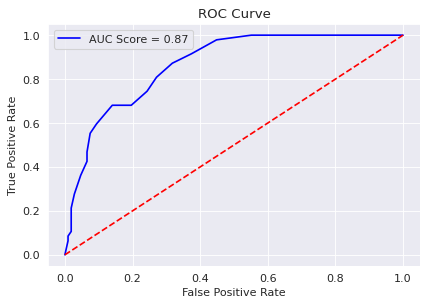

In [36]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model with Normalization::")
print(metrics.accuracy_score(y_test_norm,knn_pred_norm))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,knn_pred_norm),'\n')
print("\n","ROC Curve")
knn_prob_norm=knn_model_norm.predict_proba(x_test_norm)
knn_prob_norm1=knn_prob_norm[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,knn_prob_norm1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

We can clearly see that KNN with Standardization is better than Normalization, So later models will be build using Standardization and will compare with KNN

Support Vectore Classifier

SVC with linear Kernel

In [37]:
from sklearn.svm import SVC
svc_model_linear = SVC(kernel='linear',random_state=0,probability=True,C=0.01) 
svc_model_linear.fit(x_train_std,y_train)
svc_pred=svc_model_linear.predict(x_test_std)

Model Validation ==>

Accuracy Score of SVC Model with Linear Kernel::
0.8116883116883117

 Classification Report::
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       107
           1       0.75      0.57      0.65        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.80       154
 


 ROC Curve


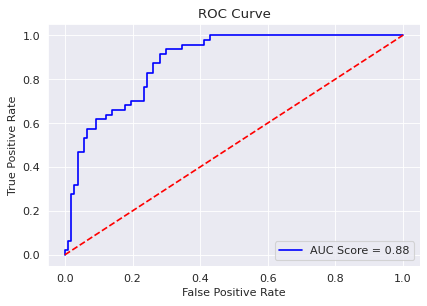

In [38]:
print("Model Validation ==>\n")
print("Accuracy Score of SVC Model with Linear Kernel::")
print(metrics.accuracy_score(y_test,svc_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,svc_pred),'\n')
print("\n","ROC Curve")
svc_prob_linear=svc_model_linear.predict_proba(x_test_std)
svc_prob_linear1=svc_prob_linear[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob_linear1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

SVC with RBF Kernel

In [39]:
svc_model_rbf = SVC(kernel='rbf',random_state=0,probability=True,C=1) 
svc_model_rbf.fit(x_train_std,y_train)
svc_pred_rbf=svc_model_rbf.predict(x_test_std)

Model Validation ==>

Accuracy Score of SVC Model with RBF Kernel::
0.7857142857142857

 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.68      0.57      0.62        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154
 


 ROC Curve


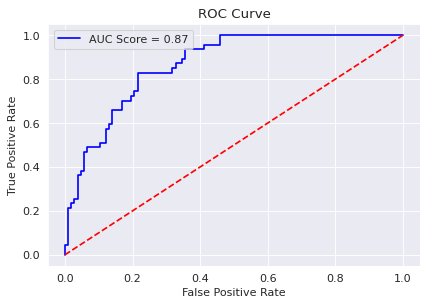

In [40]:
print("Model Validation ==>\n")
print("Accuracy Score of SVC Model with RBF Kernel::")
print(metrics.accuracy_score(y_test,svc_pred_rbf))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,svc_pred_rbf),'\n')
print("\n","ROC Curve")
svc_prob_rbf=svc_model_rbf.predict_proba(x_test_std)
svc_prob_rbf1=svc_prob_rbf[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob_rbf1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

SVC with Linear Kernel is better than RBF Kernel, This was actually expected beause variables are somewhat depending linearly with outcome

Comparing with KNN

Both Models are working fine , but SVC Linear with C=0.01 is better in terms of AUC Score.

Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.01) 
lr_model.fit(x_train_std,y_train)
lr_pred=lr_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.8116883116883117

 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.78      0.53      0.63        47

    accuracy                           0.81       154
   macro avg       0.80      0.73      0.75       154
weighted avg       0.81      0.81      0.80       154
 


 ROC Curve


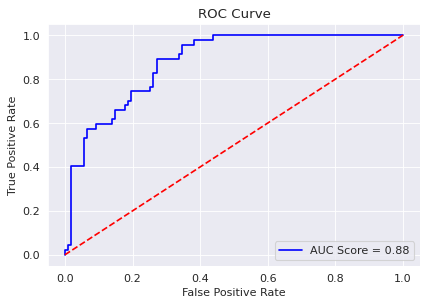

In [42]:
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,lr_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,lr_pred),'\n')
print("\n","ROC Curve")
lr_prob=lr_model.predict_proba(x_test_std)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

Accuracy of KNN is better than Logistic Regression,but auc score of Logistic regression is better

Ensemble Learning(RF)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000,random_state=0)
rf_model.fit(x_train_std,y_train)
rf_pred=rf_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.8181818181818182

 Classification Report::
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154
 


 ROC Curve


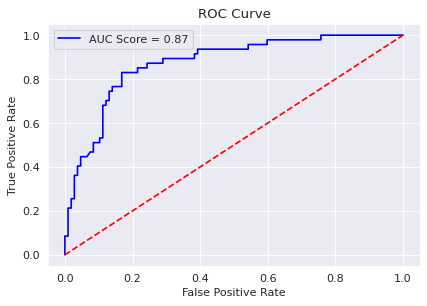

In [44]:
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,rf_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,rf_pred),'\n')
print("\n","ROC Curve")
rf_prob=rf_model.predict_proba(x_test_std)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,rf_prob1)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

So we can see Random Forest Classifier is best among all, it is considered best because balance of classes between Precision and Recall is far better than other Models.